In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import test_train_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_whole = np.concatenate((X_train, X_test))
y_whole = np.concatenate((y_train, y_test))

X_whole_gray = X_whole[...,0] * 0.299 + X_whole[..., 1] * 0.587 + X_whole[...,2] * 0.114
X_whole_gray = X_whole_gray / 255.0
y_test = keras.utils.to_categorical(y_test, 10)

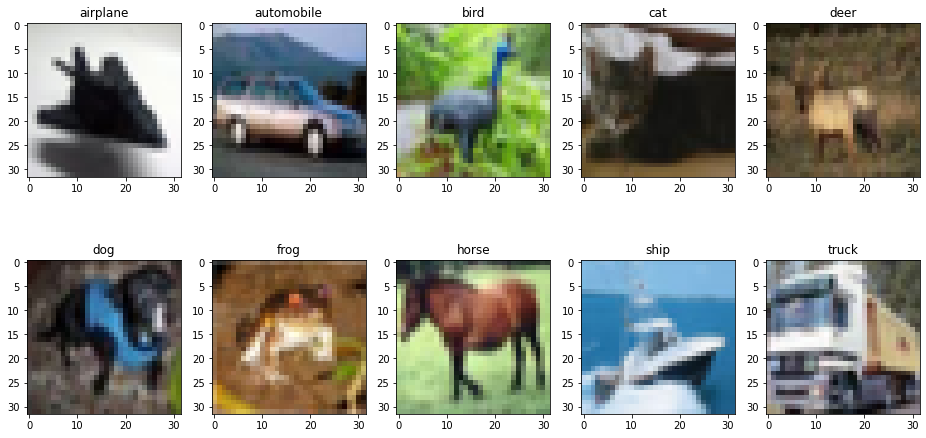

In [4]:
# showing rgb images
labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig, ax = plt.subplots(nrows=2, ncols =5, figsize = (16,8))
for i in range(10):
    index = np.argmax(y_whole == i)
    ax[i//5][i%5].imshow(X_whole[index])
    ax[i//5][i%5].set_title(labels[y_whole[index][0]])


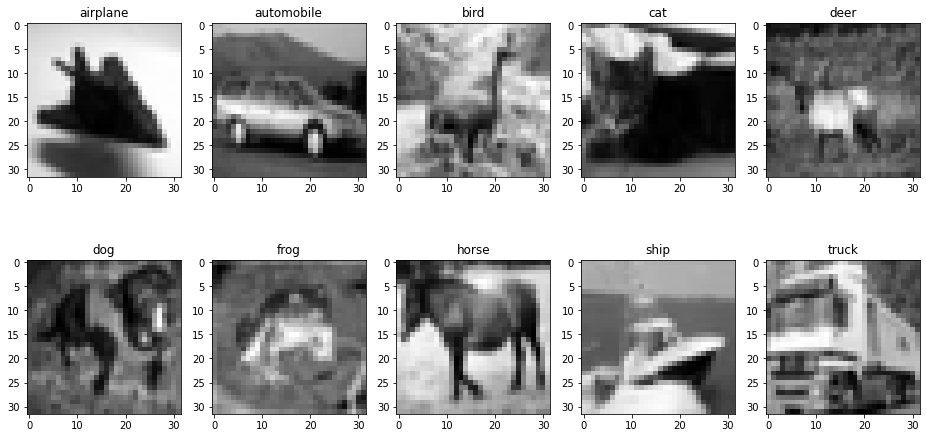

In [5]:

# showing gray images
fig, ax = plt.subplots(nrows=2, ncols =5, figsize = (16,8))
for i in range(10):
    index = np.argmax(y_whole == i)
    ax[i//5][i%5].imshow(X_whole_gray[index],cmap='gray')
    ax[i//5][i%5].set_title(labels[y_whole[index][0]])
X_whole_gray = X_whole_gray[..., np.newaxis]


In [6]:
# splitting to train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_whole_gray, y_whole, test_size=0.15, random_state=42)
print('There are {} training images and {} test images'.format(X_train.shape[0], X_test.shape[0]))

There are 51000 training images and 9000 test images


In [7]:
model = models.Sequential([
    layers.Input(shape=(32,32,1)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)


Epoch 1/10
1275/1275 [==============================] - 11s 9ms/step - loss: 1.9376 - accuracy: 0.2991 - val_loss: 1.8935 - val_accuracy: 0.3175
Epoch 2/10
1275/1275 [==============================] - 13s 10ms/step - loss: 1.9149 - accuracy: 0.3098 - val_loss: 1.9066 - val_accuracy: 0.3149
Epoch 3/10
1275/1275 [==============================] - 14s 11ms/step - loss: 1.8991 - accuracy: 0.3150 - val_loss: 1.8894 - val_accuracy: 0.3250
Epoch 4/10
1275/1275 [==============================] - 13s 10ms/step - loss: 1.8816 - accuracy: 0.3237 - val_loss: 1.8540 - val_accuracy: 0.3310
Epoch 5/10
1275/1275 [==============================] - 14s 11ms/step - loss: 1.8647 - accuracy: 0.3246 - val_loss: 1.8290 - val_accuracy: 0.3548
Epoch 6/10
1275/1275 [==============================] - 15s 12ms/step - loss: 1.8577 - accuracy: 0.3329 - val_loss: 1.8525 - val_accuracy: 0.3349
Epoch 7/10
1275/1275 [==============================] - 13s 10ms/step - loss: 1.8443 - accuracy: 0.3370 - val_loss: 1.8339 - 

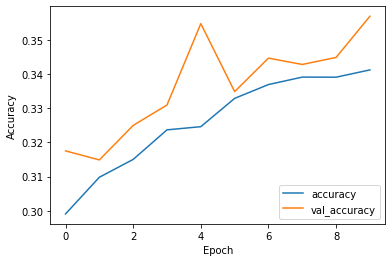

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


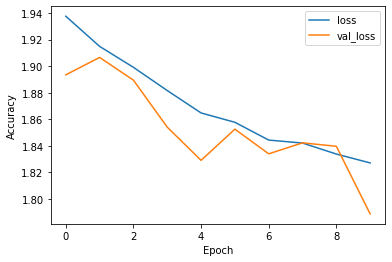

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: ', accuracy)


282/282 [==============================] - 1s 4ms/step - loss: 2.3425 - accuracy: 0.0952
Test accuracy:  0.09522221982479095


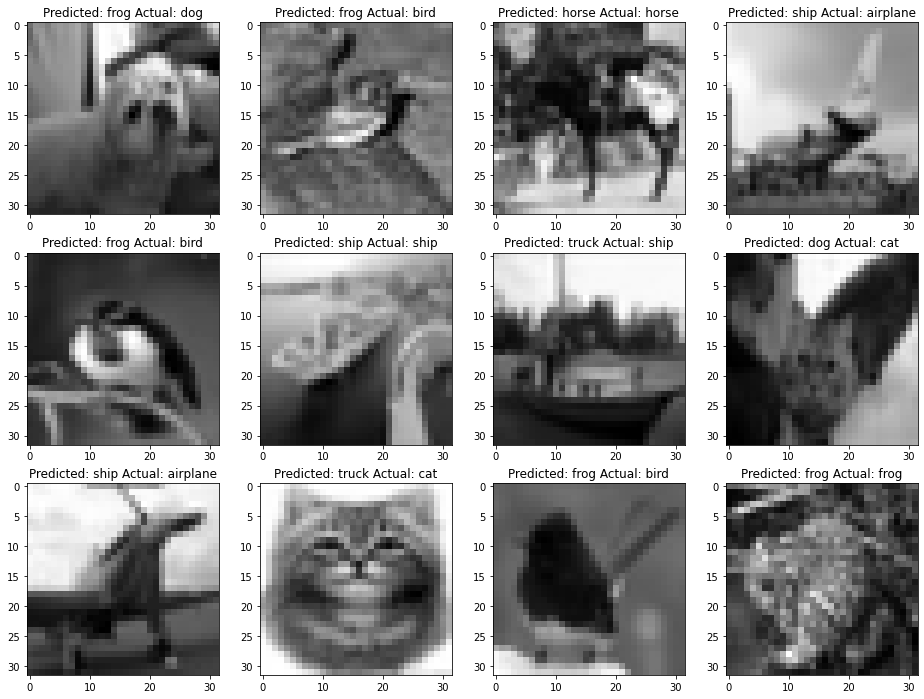

In [14]:


fig, ax = plt.subplots(nrows=3, ncols =4, figsize = (16,12))
for i in range(12):
    random_test_image = np.random.randint(0, X_test.shape[0])
    random_image_prediction = model.predict(X_test[random_test_image].reshape(1,32,32,1))
    ax[i//4][i%4].imshow(X_test[random_test_image],cmap='gray')
    ax[i//4][i%4].set_title('Predicted: {} Actual: {}'.format(labels[np.argmax(random_image_prediction)], labels[y_test[random_test_image][0]]))


In [19]:
model = models.Sequential([
    layers.Input(shape=(32,32,1)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)


Epoch 1/10
1275/1275 [==============================] - 12s 9ms/step - loss: 2.2521 - accuracy: 0.1449 - val_loss: 2.1317 - val_accuracy: 0.2136
Epoch 2/10
1275/1275 [==============================] - 10s 8ms/step - loss: 2.1046 - accuracy: 0.2256 - val_loss: 2.0255 - val_accuracy: 0.2679
Epoch 3/10
1275/1275 [==============================] - 10s 8ms/step - loss: 2.0206 - accuracy: 0.2674 - val_loss: 1.9460 - val_accuracy: 0.2969
Epoch 4/10
1275/1275 [==============================] - 11s 8ms/step - loss: 1.9635 - accuracy: 0.2924 - val_loss: 1.8970 - val_accuracy: 0.3188
Epoch 5/10
1275/1275 [==============================] - 11s 9ms/step - loss: 1.9206 - accuracy: 0.3095 - val_loss: 1.8669 - val_accuracy: 0.3237
Epoch 6/10
1275/1275 [==============================] - 11s 9ms/step - loss: 1.8852 - accuracy: 0.3225 - val_loss: 1.8495 - val_accuracy: 0.3366
Epoch 7/10
1275/1275 [==============================] - 12s 9ms/step - loss: 1.8580 - accuracy: 0.3360 - val_loss: 1.8187 - val_ac

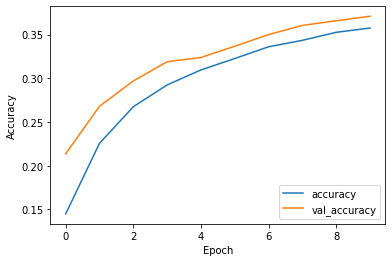

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


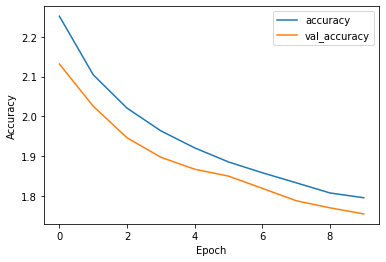

In [22]:
plt.plot(history.history['loss'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: ', accuracy)


282/282 [==============================] - 1s 5ms/step - loss: 1.7551 - accuracy: 0.3681
Test accuracy:  0.36811110377311707


Model was trained with Adam and SGD optimizers. Both of them were trained for 10 epochs and they need further training.
Adam optimizer achieved 35% accuracy while SGD had 36.8%. Dropout was used for both models to prevent overfitting. If we train the model for further 50 epochs, it would surely suffer from overfitting as for the image classification tasks it is better to use CNN instead of MLP

#### A test accuracy of 36.8% was achieved. According to loss and accuracy charts, the model was not trained enough in 10 epochs (which was the assignment limit). But if we take a closer look at loss chart, the training loss was going to smaller than validation loss which is a potenial sign of overfitting. Although I used Dropout to prevent overfitting, it seems to be insufficient, as in the image classification tasks, we should use CNN, not MLP.